## Simple Linear Regression 
### Problem Statement : Predict the percentage of an student based on the number of study hours. 

This is a problem of simple linear regression involving two variables
1. Hours
2. Scores

## Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

## Dataset

In [2]:
df = pd.read_csv('task1_data.csv')
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Relation between our feature and target variable

<Figure size 864x576 with 0 Axes>

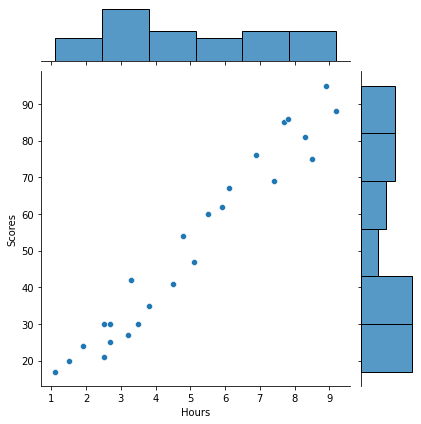

In [3]:
plt.figure(figsize=(12,8))
sns.jointplot(x=df['Hours'], y=df['Scores'])
plt.show()

## Seperating our data as feature and labels

In [4]:
X = df['Hours']
y = df['Scores']

In [5]:
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

## Splitting our dataset to provide Training and Testing data for our Regression Model

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model training
We will be using the Linear Regression Model for this probelm statement

In [7]:
Regressor = LinearRegression()
print('Model Training...')
Regressor.fit(X_train, y_train)
print("Training Completed.")

Model Training...
Training Completed.


In [8]:
Regressor.score(X_train, y_train)

0.9515510725211553

In [9]:
Regressor.score(X_test, y_test)

0.9454906892105356

In [10]:
pred = Regressor.predict(X_test)

## Visual Representation of Model Performance on Train Data

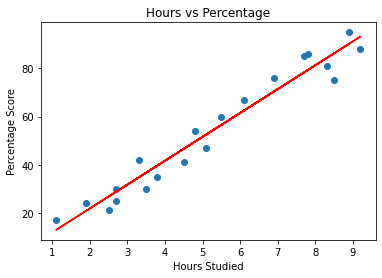

In [11]:
plt.scatter(X_train, y_train)
plt.plot(X_train, Regressor.predict(X_train), color='red')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

## Visual Representation of Model Performance on Test Data

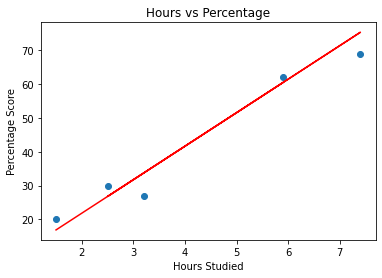

In [12]:
plt.scatter(X_test, y_test)
plt.plot(X_test, pred, color='red')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

In [13]:
pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [14]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

## Table depicting the Expected and Predicted Values by Regression Model

In [15]:
table = pd.DataFrame({'Expected' : [16.88414476,33.73226078,75.357018,26.79480124,60.49103328],
                     'Predicted' : [20,27,69,30,62]})
table['Error'] = abs(table['Expected'] - table['Predicted'])
table

,Expected,Predicted,Error
0,16.884145,20,3.115855
1,33.732261,27,6.732261
2,75.357018,69,6.357018
3,26.794801,30,3.205199
4,60.491033,62,1.508967


## Mean Absolute Error

In [16]:
from sklearn import metrics
print("Mean Absolute Error :", metrics.mean_absolute_error(y_test, pred))

Mean Absolute Error : 4.183859899002975


## r2_score - Model Accuracy

In [17]:
from sklearn.metrics import r2_score
acc = r2_score(y_test, pred)

print("--------------------------------------Model Accuracy-------------------------------------")
print()
print('Based on the given data, our model performs well and has an accuracy of', acc*100, '%')
print()
print("-----------------------------------------------------------------------------------------")

--------------------------------------Model Accuracy-------------------------------------

Based on the given data, our model performs well and has an accuracy of 94.54906892105356 %

-----------------------------------------------------------------------------------------


## Prediction using Regression Model

In [18]:
value = np.array(9.25).reshape(-1,1)
Regressor.predict(value)
print("Student studying for 9.25 hours has a high chance of scoring around 93.7% in exam.")

Student studying for 9.25 hours has a high chance of scoring around 93.7% in exam.
